# MUSE-to-H&E CycleGAN training

In [1]:
from fastai.vision.all import *
from fastai.basics import *
from upit.models.cyclegan import *
from upit.train.cyclegan import *
from upit.data.unpaired import *

In [2]:
data_path = Path('/mnt/wamri/WAMRI-LevensonLab/datasets/').expanduser()
muse2he_path = data_path/'muse2he_urothelial_carcinoma'
muse2he_path.ls()

muse_path = muse2he_path/'trainA_2'
he_path = muse2he_path/'trainB'

torch.cuda.set_device(3) #set GPU id

In [3]:
dls = get_dls(muse_path, he_path, load_size=512, crop_size=256)

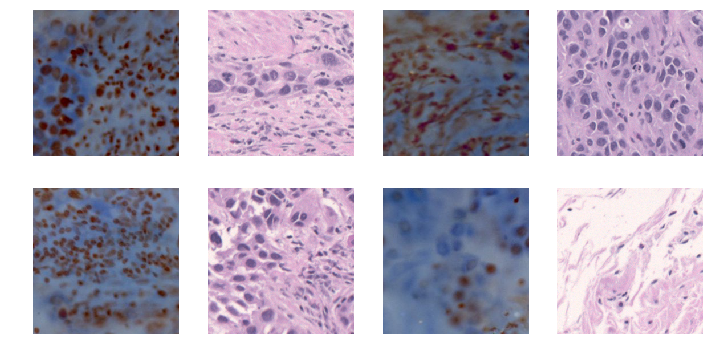

In [4]:
dls.show_batch()

In [5]:
cycle_gan = CycleGAN(3,3,64, gen_blocks=9)
learn = cycle_learner(dls, cycle_gan,opt_func=partial(Adam,mom=0.5,sqr_mom=0.999))

/home/tmabraham/anaconda3/lib/python3.7/site-packages/fastai/callback/core.py:50: UserWarning: You are setting an attribute (training) that also exists in the learner, so you're not setting it in the learner but in the callback. Use `self.learn.training` otherwise.
  warn(f"You are setting an attribute ({name}) that also exists in the learner, so you're not setting it in the learner but in the callback. Use `self.learn.{name}` otherwise.")
/home/tmabraham/anaconda3/lib/python3.7/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=0.00013182566908653826)

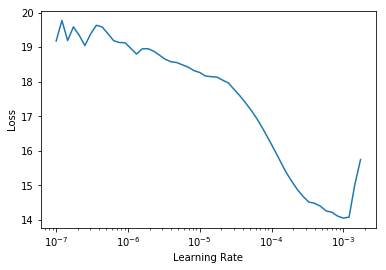

In [10]:
#cuda
learn.lr_find()

In [11]:
#cuda
learn.fit_flat_lin(100,100,2e-4)

epoch,train_loss,id_loss_A,id_loss_B,gen_loss_A,gen_loss_B,cyc_loss_A,cyc_loss_B,D_A_loss,D_B_loss,time
0,7.417404,0.909434,1.247195,0.380473,1.007897,1.903132,2.477613,0.320607,0.648446,00:23
1,5.800429,0.678376,0.771522,0.300032,0.301161,1.424437,1.521033,0.279420,0.302534,00:23
2,5.198680,0.648744,0.743081,0.292197,0.297938,1.348492,1.426583,0.266505,0.271746,00:23
3,5.018014,0.654370,0.773309,0.293715,0.300661,1.328317,1.466822,0.257395,0.255209,00:23
4,4.812803,0.637383,0.740352,0.298415,0.305070,1.278749,1.391372,0.251299,0.242807,00:24
5,4.537159,0.604942,0.640458,0.292239,0.311775,1.232206,1.209354,0.250010,0.236268,00:24
6,4.429152,0.583105,0.662651,0.301440,0.319686,1.166900,1.308228,0.249331,0.232657,00:25
7,4.285316,0.567250,0.594665,0.297065,0.316238,1.149095,1.199649,0.244108,0.233671,00:25
8,4.187201,0.541337,0.591997,0.295623,0.323326,1.099016,1.177008,0.239307,0.233275,00:26
9,4.018625,0.542643,0.512892,0.304319,0.320082,1.083206,1.100887,0.244814,0.234950,00:26


In [17]:
learn.save('muse2he-200epoch')

Path('models/muse2he-200epoch.pth')

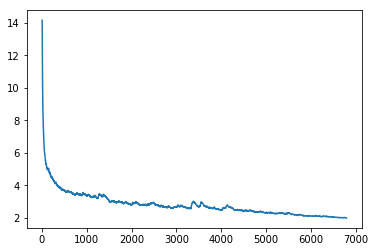

In [12]:
learn.recorder.plot_loss(with_valid=False)

In [15]:
b = dls.train.one_batch()
_,_,preds = learn.get_preds(dl=[b], with_decoded=True)

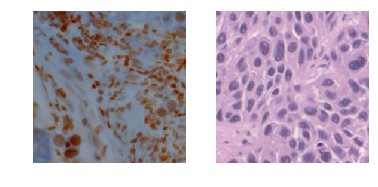

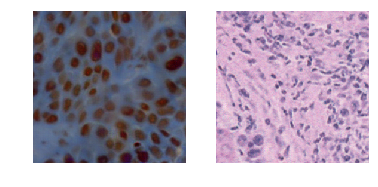

In [16]:
dls.show_batch((b[0], b[1]), max_n=1, show=True)
dls.show_batch((preds[0],preds[1]), max_n=1, show=True)